In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df2=pd.read_excel('Final_Test.xlsx')
df1=pd.read_excel('Final_Train.xlsx')


In [3]:
df1.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
df2.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


# Train Data

In [5]:
# Checking the shape of train data

df1.shape

(5961, 7)

In [6]:
df1.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [7]:
df1.isnull().values.any()

True

In [8]:
df1.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [9]:
df1.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [10]:
for col in ['Rating','Miscellaneous_Info','Place']:
    df1[col].fillna(df1[col].mode()[0],inplace=True)


In [11]:
df1.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

In [12]:
df1.dropna(inplace=True)

# Summary Statistics

In [13]:
df1.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


Observation:

1.Minimum Fee is Rs.5 and Maximum Fee is Rs.950.

2.Mean is greater than median Thats why the Fees column is right skewed.

# Exploratory Data Analysis

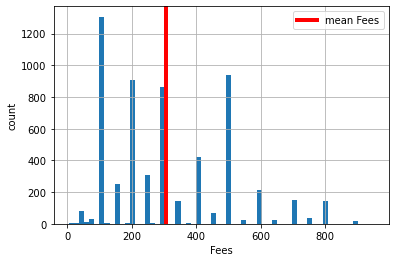

In [14]:
#Checking the mean Fees

Fees=df1['Fees'].hist(bins=60)
mean_val=np.mean(df1['Fees'])
plt.axvline(mean_val,linewidth=4,color='red',label='mean Fees')
plt.xlabel('Fees')
plt.ylabel('count')
plt.legend()
plt.show()

In [15]:
df1.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [16]:
df1_cor=df1.corr()

In [17]:
df1_cor

,Fees
Fees,1.0


In [18]:
print(df1['Qualification'].value_counts())

BDS                                                                                                                488
BHMS                                                                                                               477
BAMS                                                                                                               471
MBBS                                                                                                               334
MBBS, MS - ENT                                                                                                     220
                                                                                                                  ... 
BHMS, One Year Certificate course in Hospital Management , Certified Course in Yoga                                  1
MDS - Oral Medicine and Radiology, BDS, PhD - Orthodontics & Dentofacial Orthopaedics                                1
MBBS, MD - Dermatology , Venereology & Leprosy, 

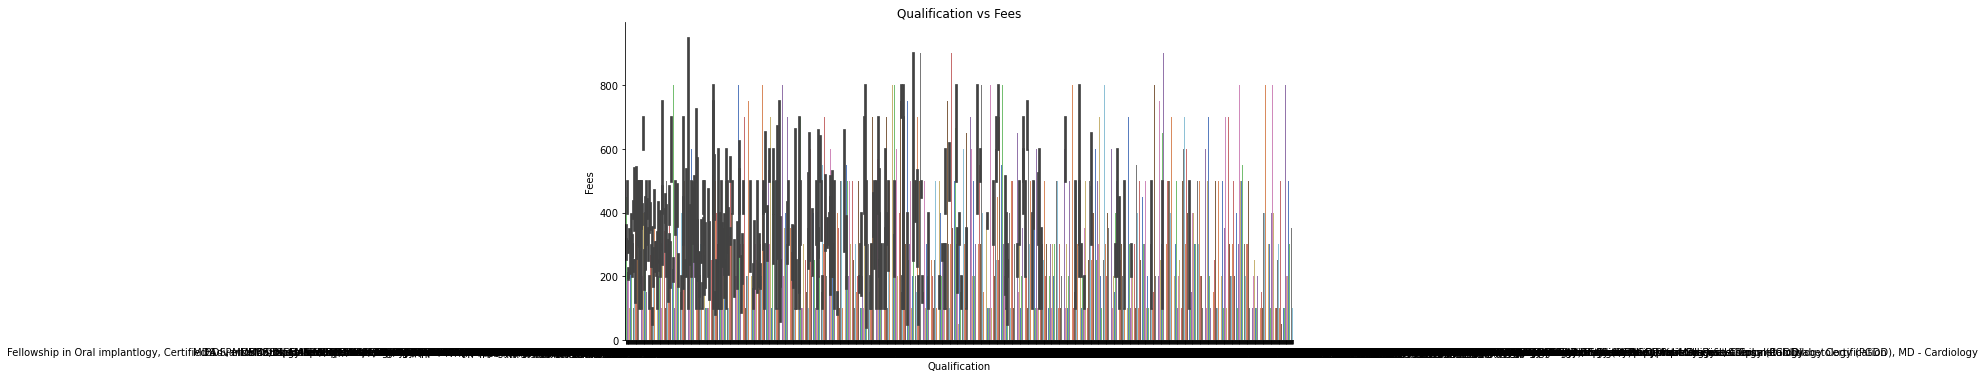

In [19]:
sns.factorplot(x='Qualification',y='Fees',data=df1,kind='bar',size=5,palette='muted',aspect=2)
plt.title('Qualification vs Fees')
plt.ylabel('Fees')
plt.show()

In [20]:
print(df1['Experience'].value_counts())

9 years experience     323
10 years experience    294
11 years experience    288
8 years experience     282
12 years experience    279
                      ... 
59 years experience      1
58 years experience      1
60 years experience      1
66 years experience      1
65 years experience      1
Name: Experience, Length: 64, dtype: int64


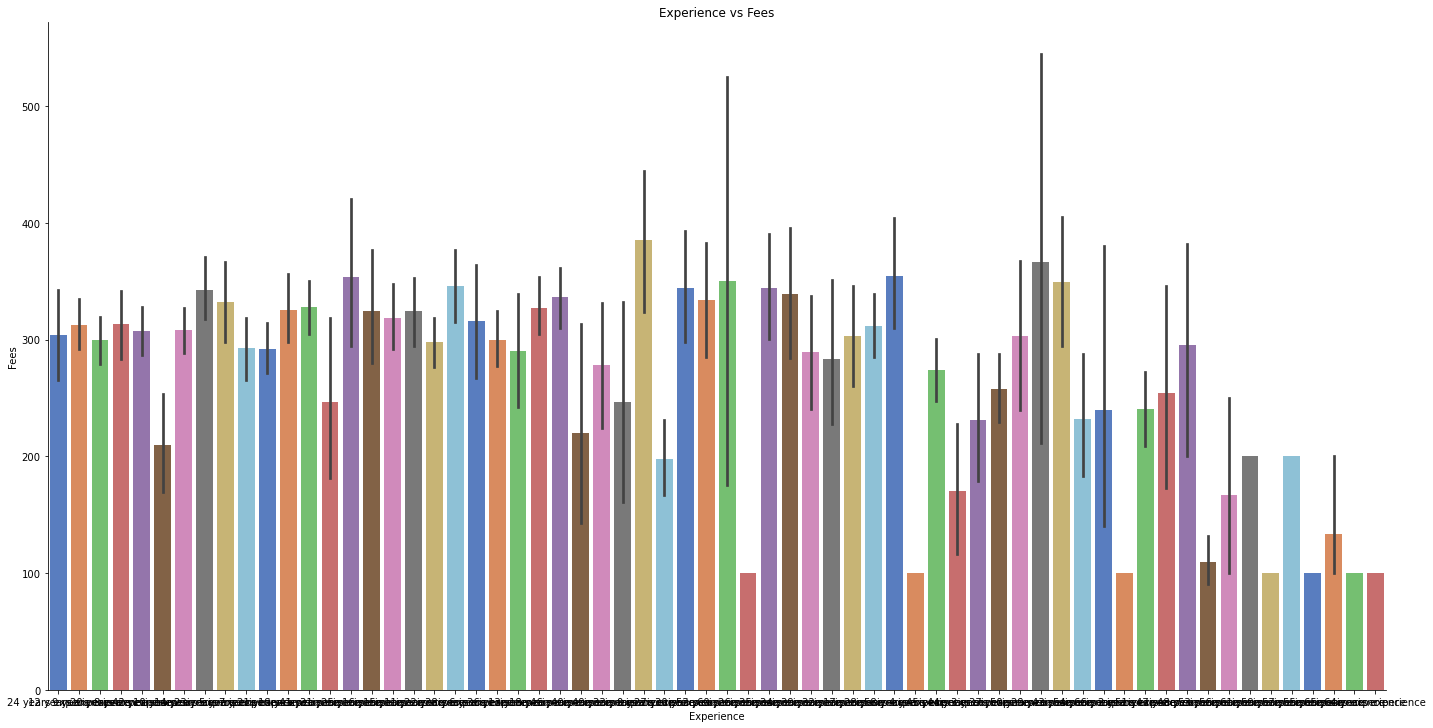

In [21]:
sns.factorplot(x='Experience',y='Fees',data=df1,kind='bar',size=10,palette='muted',aspect=2)
plt.title('Experience vs Fees')
plt.ylabel('Fees')
plt.show()

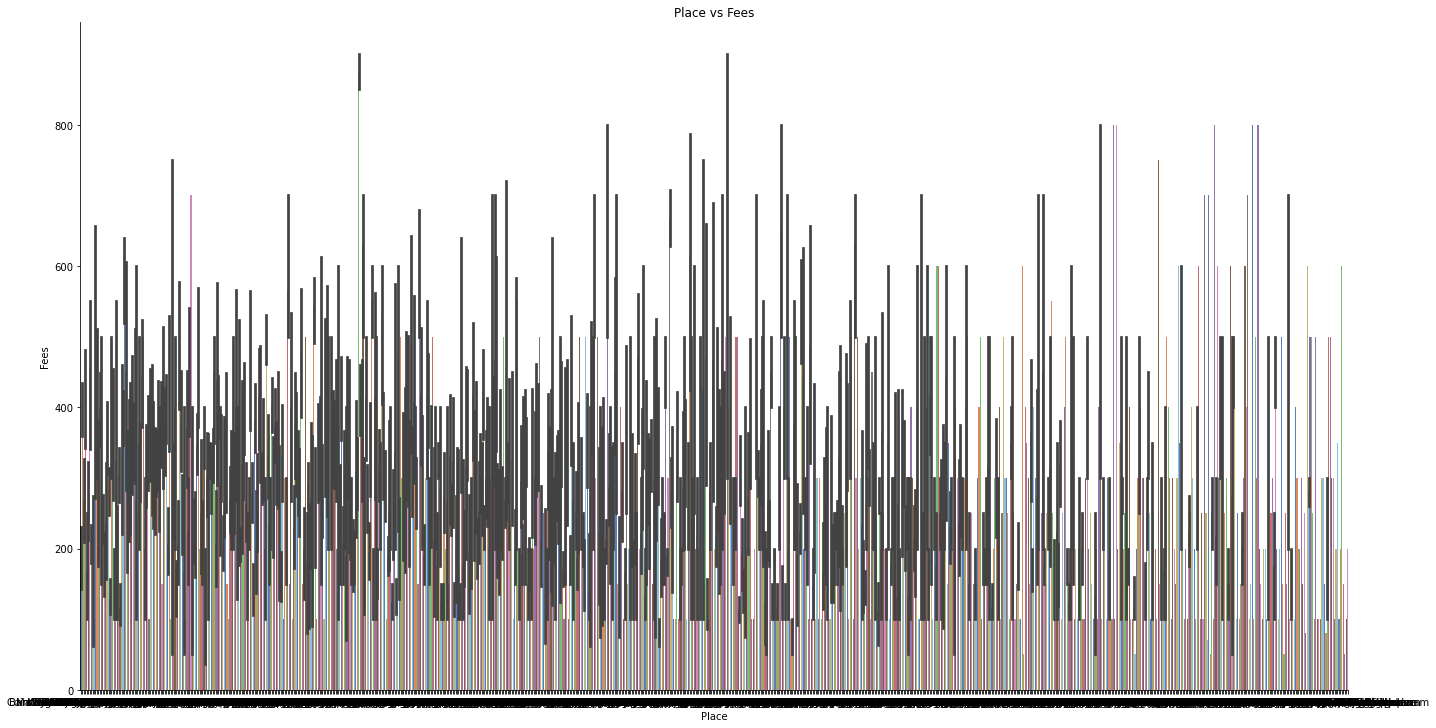

In [22]:
sns.factorplot(x='Place',y='Fees',data=df1,kind='bar',size=10,palette='muted',aspect=2)
plt.title('Place vs Fees')
plt.ylabel('Fees')
plt.show()

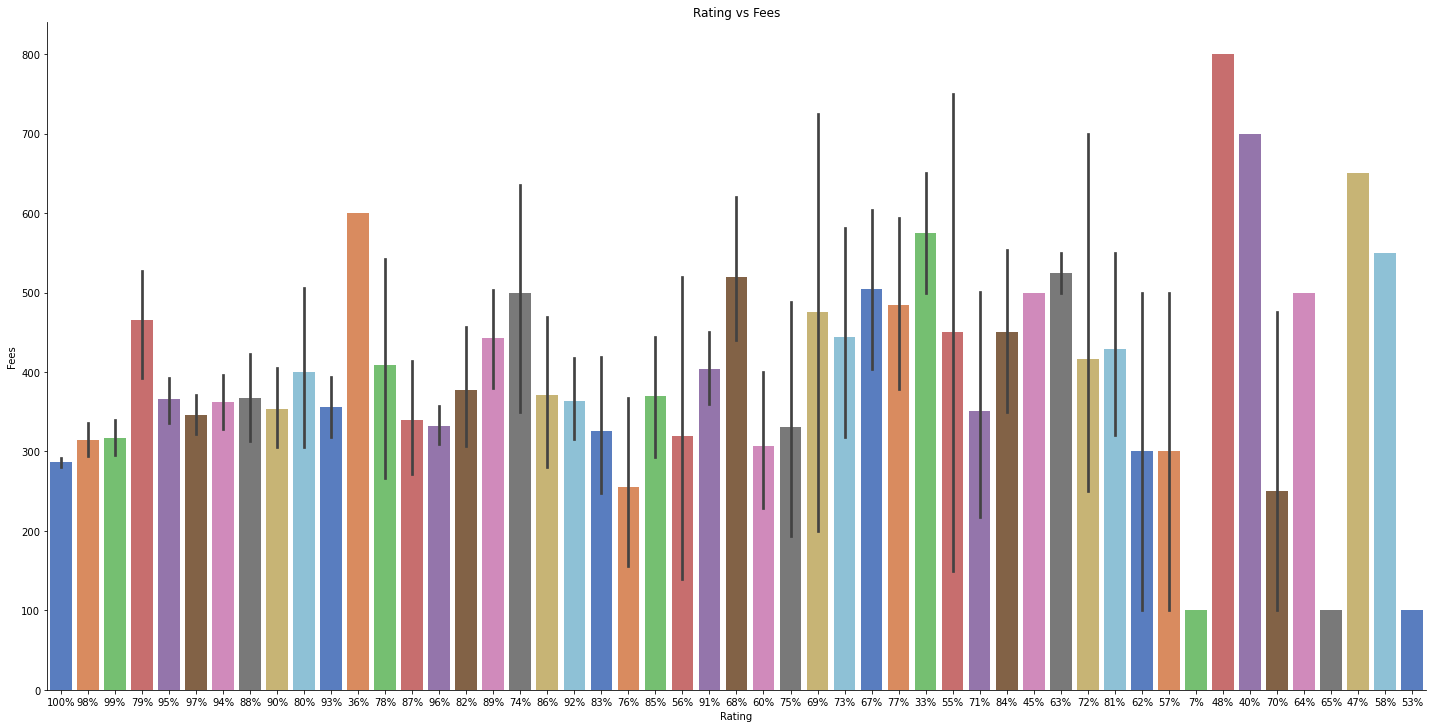

In [23]:
sns.factorplot(x='Rating',y='Fees',data=df1,kind='bar',size=10,palette='muted',aspect=2)
plt.title('Rating vs Fees')
plt.ylabel('Fees')
plt.show()

# Handling Categorical Data

In [24]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in df1.columns:
    if df1[column].dtype==np.number:
        continue
    df1[column]=le.fit_transform(df1[column])

In [25]:
df1.dtypes

Qualification         int32
Experience            int32
Rating                int32
Place                 int32
Profile               int32
Miscellaneous_Info    int32
Fees                  int64
dtype: object

# Test Data

In [26]:
print('Test Data info')
print("*"*85)
print(df2.info)

Test Data info
*************************************************************************************
<bound method DataFrame.info of                                         Qualification           Experience  \
0                                                MBBS  35 years experience   
1          MBBS, Diploma in Otorhinolaryngology (DLO)  31 years experience   
2                                          MBBS, DDVL  40 years experience   
3                                                BAMS   0 years experience   
4     BDS, MDS - Conservative Dentistry & Endodontics  16 years experience   
...                                               ...                  ...   
1982                         BAMS, Doctor of Medicine  10 years experience   
1983   MD - Dermatology , Venereology & Leprosy, MBBS   4 years experience   
1984         MBBS, MD / MS - Obstetrics & Gynaecology   9 years experience   
1985                                              BDS  12 years experience   
1986   MB

In [27]:
df2.dropna(inplace=True)

In [28]:
df2.isnull().values.any()

False

In [29]:
df2.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in df2.columns:
    if df2[column].dtype==np.number:
        continue
    df2[column]=le.fit_transform(df2[column])

In [31]:
df2.dtypes

Qualification         int32
Experience            int32
Rating                int32
Place                 int32
Profile               int32
Miscellaneous_Info    int32
dtype: object

In [32]:
df1.describe()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,596.857574,23.010904,14.534139,414.368059,2.441872,1573.343902,18.930381
std,413.842446,20.937163,21.137633,258.547684,1.658014,640.388185,8.185456
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,219.000000,6.000000,0.000000,197.000000,1.000000,1477.000000,12.000000
50%,596.000000,15.000000,0.000000,407.000000,2.000000,1595.000000,21.000000
75%,943.000000,36.000000,42.000000,628.000000,4.000000,1746.000000,28.000000
max,1419.000000,63.000000,50.000000,876.000000,5.000000,2997.000000,39.000000


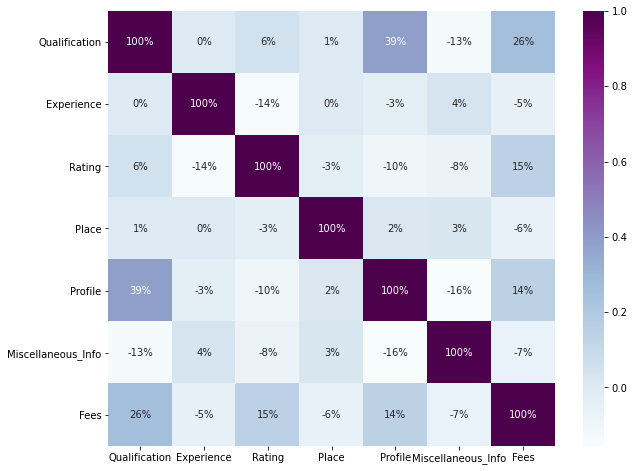

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot=True,fmt='.0%',cmap='BuPu')
plt.show()

Text(0.5, 1.0, 'Correlation with target variable')

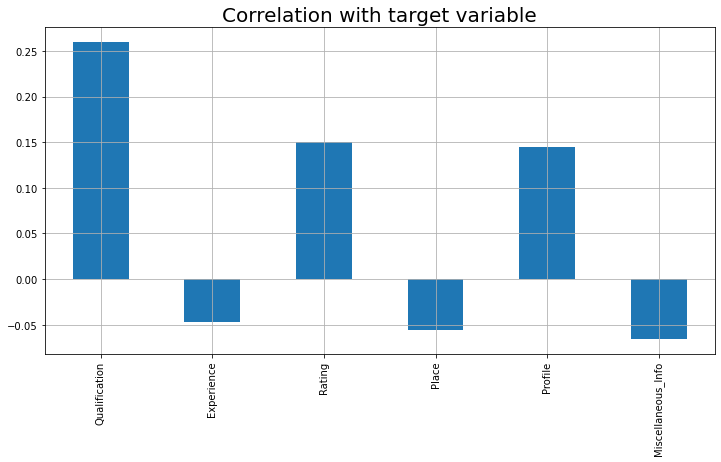

In [34]:
#Correlation with target column

plt.figure(figsize=(12,6))
df1.drop('Fees',axis=1).corrwith(df1['Fees']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title('Correlation with target variable',fontsize=20)

# Removing Outliers

In [35]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[4.73305738e-01, 3.34882629e-01, 6.87653037e-01, ...,
        1.54301587e+00, 2.25404687e+00, 1.21327552e+00],
       [1.26594438e+00, 9.55840219e-01, 1.63068173e+00, ...,
        1.47289258e+00, 2.36351328e-01, 3.75040384e-01],
       [1.30046489e+00, 1.91011789e+00, 6.87653037e-01, ...,
        3.36652489e-01, 3.38199785e-02, 2.52862237e-01],
       ...,
       [2.07239780e-03, 5.72670771e-01, 1.58336878e+00, ...,
        9.39834180e-01, 6.25210608e-01, 1.35246556e+00],
       [8.36481290e-01, 8.12542314e-01, 1.25217810e+00, ...,
        9.39834180e-01, 9.81762078e-01, 1.21327552e+00],
       [8.55125573e-01, 7.17010377e-01, 6.87653037e-01, ...,
        8.69710893e-01, 3.38199785e-02, 6.02384790e-01]])

In [36]:
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [37]:
df1_new=df1[(z<3).all(axis=1)]

In [38]:
print(df1.shape, '\t\t', df1_new.shape)

(5961, 7) 		 (5961, 7)


# Feature Selection

In [39]:
df1.shape

(5961, 7)

In [40]:
df1.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [41]:
#Splitting the data into input and output variable

x=df1.drop(columns=['Fees','Miscellaneous_Info'],axis=1)
x.head()

,Qualification,Experience,Rating,Place,Profile
0,401,16,0,299,5
1,73,3,49,866,0
2,1135,63,0,457,3
3,464,3,0,68,0
4,10,12,0,337,0


In [42]:
y=df1['Fees']
y.head()

0     9
1    22
2    21
3    17
4    17
Name: Fees, dtype: int64

In [43]:
#Checking the shape of input and target variable

print(x.shape, '\t\t', y.shape)

(5961, 5) 		 (5961,)


In [46]:
#Scaling in input variables

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [48]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [49]:
#Importing all the model library

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Importing Boosting Model

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Importing error metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [50]:
# All Algorithm by using for loop

model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm= m.predict(x_test)
    print('score of',m,'is:',score)
    print('MAE:',mean_absolute_error(y_test,predm))
    print('MSE:',mean_squared_error(y_test,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
    print('R2_score:',r2_score(y_test,predm))
    print('***********************************************')
    print('\n')

score of LinearRegression() is: 0.0940020737641949
MAE: 6.508235190126493
MSE: 58.04288101092318
RMSE: 7.618587861994057
R2_score: 0.09151384984582911
***********************************************


score of SVR() is: 0.11593172134978935
MAE: 6.226733896081705
MSE: 57.84186409531041
RMSE: 7.605383888753441
R2_score: 0.094660163064612
***********************************************


score of DecisionTreeRegressor() is: 0.9965763191866844
MAE: 7.714305671975412
MSE: 102.36828257427587
RMSE: 10.117721214496665
R2_score: -0.6022665538655176
***********************************************


score of KNeighborsRegressor() is: 0.3598298961581491
MAE: 6.3190276613579215
MSE: 61.29398155909472
RMSE: 7.829047295750277
R2_score: 0.040627681390189574
***********************************************


score of Lasso() is: 0.05913877716270233
MAE: 6.8116328209295105
MSE: 60.36748411022806
RMSE: 7.769651479328275
R2_score: 0.055129203123580495
***********************************************


score